### DSP Homework 1 

## Checking Gibs phenomenon 

(1) Square pulse 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

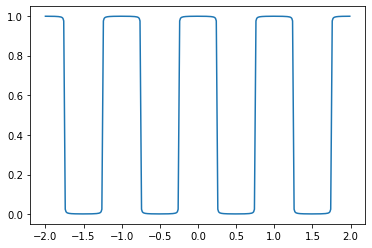

In [61]:
# Plot a sinc function (discrete) 

N = 200
dc = 0.5
tp = 1
trange = np.arange(-2, 2, 0.01)


fund_freq = 2 * np.pi / tp 


k_lst = np.arange(-N, N+1, 1).reshape(-1, 1)

aks = dc * np.sinc(dc * k_lst)

ns = aks * np.exp(1j * k_lst * fund_freq * trange)
ns = np.sum(ns, axis=0)

plt.figure()
plt.plot(trange, ns.real)

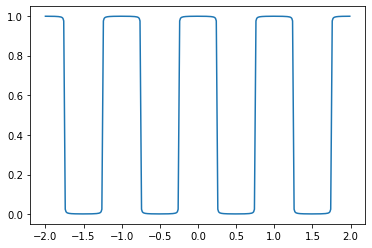

In [62]:
ns = aks * np.exp(1j * k_lst * fund_freq * trange)
ns = np.sum(ns, axis=0)

plt.figure()
plt.plot(trange, ns.real)

<StemContainer object of 3 artists>

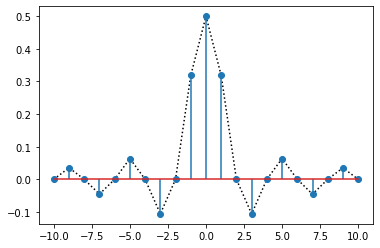

In [47]:
plt.figure()
plt.plot(k_lst, aks, ':k', label="envelope")
plt.stem(k_lst, aks)